In [5]:
from itertools import product

import unidecode
import unicodedata

import numpy as np
import pickle

In [7]:
def uncertainty(verde, amarelo, laranja, vermelho, isin_pos, isin, l3):
    if len(verde) + len(amarelo) > 0:
        uncert_set = set.intersection(*([isin_pos[cp] for cp in verde] + [isin[c] for c in amarelo]))
    else:
        uncert_set = set(l3)
    if len(vermelho) > 0:
        uncert_set -= set.union(*([isin_pos[cp] for cp in laranja] + [isin[c] for c in vermelho]))
        
    return uncert_set

In [3]:
with open("palavras.txt", "r") as f:
    l = f.readlines() 

In [4]:
l = [w[:-1] for w in l if len(w) == 6]

In [5]:
l = [w for w in l if "-" not in w]

In [6]:
l = [w for w in l if "." not in w]

In [7]:
l = [w for w in l if "'" not in w]

In [8]:
len(l)

10584

In [9]:
l2 = [unidecode.unidecode(w) for w in l]

In [10]:
l2 = [w for w in l2 if w[0].isupper() == False]

In [11]:
l3 = sorted(list(set(l2) - set(['miRNA'])))

In [12]:
len(l3)

8611

In [13]:
alphabet = "abcdefghijklmnopqrstuvwxyz"

In [14]:
count ={}
for c in alphabet:
    count[c] = 0
    for w in l3:
        if c in w:
            count[c] +=1

# Buscando a melhor palavra inicial - atual: "serão"

In [15]:
score = {}
for w in l3:
    score[w] = 0
    for c in set(w):
        if c in count.keys():
            score[w] += count[c]
        else:
            score[w] = 0
            print(c)

In [16]:
ranking_palpites = sorted(score.items(), key=lambda x:-x[1])

In [22]:
lexico = l3#[6000:7000]

In [23]:
isin = {c:set([w for w in lexico if c in w]) for c in alphabet}

isin_pos = {cp:set([w for w in lexico if cp in set(enumerate(w))]) for cp in list(product(range(5),alphabet))}

In [24]:
if False:
    performance = {}
else:
    with open('performance.pkl', 'rb') as p:
        performance = pickle.load(p)

In [39]:
# performance = {}
for w_palpite in lexico:  #, _ in ranking_palpites:
    if w_palpite not in performance.keys():
        lens = []
        for w_do_dia in set(lexico)-set([w_palpite]):
            verde = set(enumerate(w_palpite)) & set(enumerate(w_do_dia))
            amarelo = set(w_palpite) & set(w_do_dia)
            laranja = set([(i,w) for (i,w) in set(enumerate(w_palpite)) if w in amarelo]) - verde
            vermelho = set(w_palpite) - set(w_do_dia) - amarelo
            uncert_set = uncertainty(verde, amarelo, laranja, vermelho, isin_pos, isin, l3)

            lens.append(len(uncert_set))
        performance[w_palpite] = lens
    print(".", end="")


..........................

KeyboardInterrupt: 

In [ ]:
with open('performance.pkl', 'wb') as p:
    pickle.dump(performance, p)    

In [42]:
import numpy as np

ranking_palpites_exaustivo = sorted([(w,np.percentile(performance[w], 99)) for w in performance.keys()], key=lambda x:x[1])
ranking_palpites_exaustivo[:20]

[('estao', 7717.0),
 ('entao', 7718.0),
 ('autor', 7735.0),
 ('outra', 7735.0),
 ('horas', 7737.0),
 ('visao', 7738.0),
 ('maior', 7739.0),
 ('irmao', 7739.0),
 ('torna', 7739.0),
 ('moral', 7740.0),
 ('valor', 7741.0),
 ('claro', 7743.0),
 ('tomar', 7744.0),
 ('frota', 7744.0),
 ('patio', 7744.0),
 ('troca', 7745.0),
 ('porta', 7745.0),
 ('honra', 7746.0),
 ('noiva', 7747.0),
 ('navio', 7747.0)]

# Palavras da wikipedia

In [31]:
with open('word_count.pkl', 'rb') as p:
    word_count = pickle.load(p)

In [32]:
lexico_wiki = [w for w,c in word_count.items() if (c > 200) and w[0].isupper() == False] #sorted(, key=lambda x:-x[1])

In [42]:
score_wiki = {}
for w in lexico_wiki:
    score_wiki[w] = 0
    for c in set(w):
        if c in count.keys():
            score_wiki[w] += count[c]
        else:
            score_wiki[w] = 0
            print(c,end=",")

L,T,D,5,2,0,1,0,6,0,1,3,0,5,1,0,5,0,7,2,3,0,9,0,E,9,1,0,4,5,0,4,2,0,5,0,0,4,1,0,4,2,0,7,6,2,3,0,7,2,0,2,1,0,4,3,1,1,4,8,0,2,7,2,1,0,1,0,7,1,8,1,D,2,3,0,2,1,2,3,0,5,1,1,0,4,5,3,0,A,0,1,6,1,0,6,1,1,0,3,0,6,9,0,8,1,8,1,0,9,2,1,0,2,0,4,1,0,7,2,3,0,9,1,2,9,3,0,1,5,1,5,2,8,2,9,2,3,0,2,3,9,4,5,2,0,5,2,1,S,O,5,4,2,6,8,1,0,2,0,4,5,0,2,0,5,3,8,3,0,1,1,4,2,1,7,1,3,6,X,2,3,3,A,

In [43]:
ranking_palpites_wiki = sorted(score_wiki.items(), key=lambda x:-x[1])

In [44]:
len(lexico_wiki)

2458

In [45]:
isin_wiki = {c:set([w for w in lexico_wiki if c in w]) for c in alphabet}

isin_pos_wiki = {cp:set([w for w in lexico_wiki if cp in set(enumerate(w))]) for cp in list(product(range(5),alphabet))}

In [49]:
if True:
    performance_wiki = {}
else:
    with open('performance_wiki.pkl', 'rb') as p:
        performance_wiki = pickle.load(p)

In [228]:
# performance = {}
for w_palpite,  _ in ranking_palpites_wiki:
    if w_palpite not in performance_wiki.keys():
        lens = []
        for w_do_dia in set(lexico_wiki)-set([w_palpite]):
            verde = set(enumerate(w_palpite)) & set(enumerate(w_do_dia))
            amarelo = set(w_palpite) & set(w_do_dia)
            laranja = set([(i,w) for (i,w) in set(enumerate(w_palpite)) if w in amarelo]) - verde
            vermelho = set(w_palpite) - set(w_do_dia) - amarelo
            uncert_set = uncertainty(verde, amarelo, laranja, vermelho, isin_pos_wiki, isin_wiki, lexico_wiki)

            lens.append(len(uncert_set))
        performance_wiki[w_palpite] = lens
    print(".", end="")


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

KeyboardInterrupt: 

In [229]:
with open('performance_wiki.pkl', 'wb') as p:
    pickle.dump(performance_wiki, p)    

In [230]:
import numpy as np

ranking_palpites_exaustivo_wiki = sorted([(w,np.percentile(performance_wiki[w], 100)) for w in performance_wiki.keys()], key=lambda x:x[1])
# [(w,c) for w,c in ranking_palpites_exaustivo_wiki][:20]

In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ranking_series = {}

for perc in range(30,101,5):

    ranking_palpites_exaustivo_wiki = sorted([(w,np.percentile(performance_wiki[w], perc)) for w in performance_wiki.keys()], key=lambda x:x[1])
    for w,c in ranking_palpites_exaustivo_wiki[:20]:
        if w not in ranking_series.keys():
            ranking_series[w] = []
        ranking_series[w].append([perc, c])

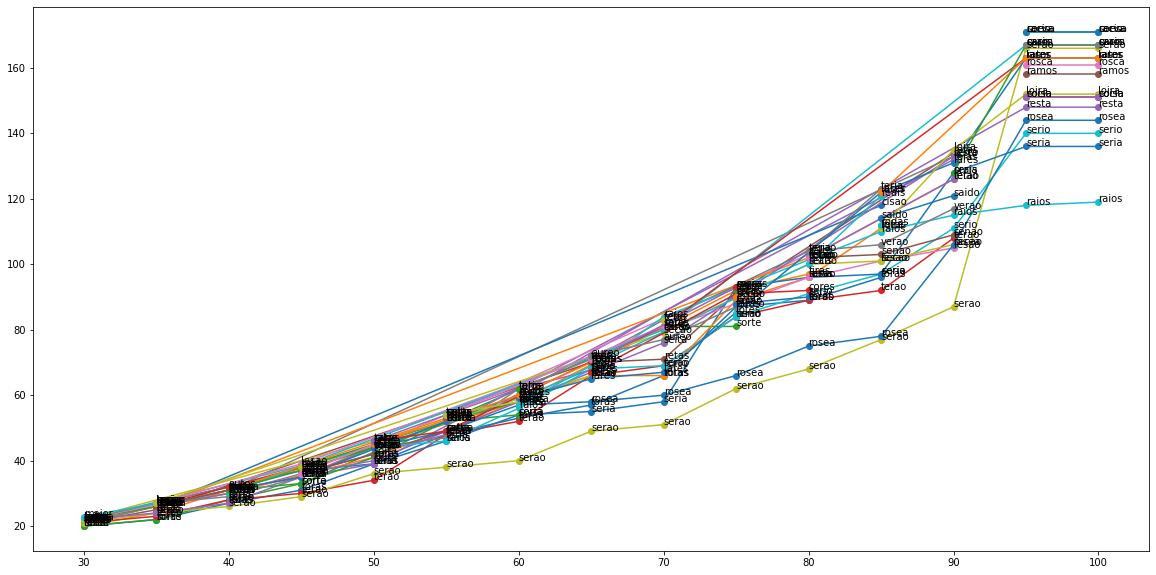

In [275]:
plt.figure(figsize=(20,10))
for w in ranking_series.keys():
    plt.plot(np.array(ranking_series[w])[:,0], np.array(ranking_series[w])[:,1],"-o")
    for x, y in ranking_series[w]:
        plt.annotate(w, (x,y))

In [183]:
ranking_palpites_exaustivo_wiki[-20:]

[('juiza', 537.0),
 ('vivam', 540.0),
 ('libia', 541.0),
 ('idade', 543.0),
 ('acabe', 544.0),
 ('reage', 546.0),
 ('advem', 546.0),
 ('capuz', 547.0),
 ('abate', 557.0),
 ('boato', 563.0),
 ('album', 565.0),
 ('death', 566.0),
 ('algum', 570.0),
 ('anodo', 578.0),
 ('opaco', 582.0),
 ('azoto', 583.0),
 ('aquem', 593.0),
 ('chave', 608.0),
 ('voado', 616.0),
 ('ajude', 643.0)]

# Quando você já tem palpites

In [28]:
def recomendar(palpites):    
    with open('word_count.pkl', 'rb') as p:
        word_count = pickle.load(p)

    lexico_wiki = [w for w,c in word_count.items() if (c > 200) and w[0].isupper() == False] #sorted(, key=lambda x:-x[1])
    alphabet = "abcdefghijklmnopqrstuvwxyz"
    isin = {c:set([w for w in lexico_wiki if c in w]) for c in alphabet}
    isin_pos = {cp:set([w for w in lexico_wiki if cp in set(enumerate(w))]) for cp in list(product(range(5),alphabet))}

    palpite_letras = "".join([w for w, pat in palpites])

    verde_entrada = set()
    amarelo_entrada = set()
    laranja_entrada = set()
    vermelho_entrada = set()

    for p in palpites:
        word =p[0]
        pattern = p[1]
        for i in range(5):
            if   pattern[i] == "g":
                verde_entrada.add((i,word[i]))
                amarelo_entrada.add(word[i])
            elif pattern[i] == "y":
                amarelo_entrada.add(word[i])
                laranja_entrada.add((i, word[i]))
            elif pattern[i] == "r":
                vermelho_entrada.add(word[i])

    vermelho_entrada -= amarelo_entrada
    laranja_entrada -= verde_entrada


    lexico = uncertainty(verde_entrada, amarelo_entrada, laranja_entrada, vermelho_entrada, isin_pos, isin, lexico_wiki)

    print(len(lexico))
    if len(lexico) <= 10:
        print(lexico)

    isin_lexico = {c:set([w for w in lexico if c in w]) for c in alphabet}

    isin_pos_lexico = {cp:set([w for w in lexico if cp in set(enumerate(w))]) for cp in list(product(range(5),alphabet))}

    performance_restrito = {}

    lexico_wiki = [w for w in lexico_wiki if len(set(w) - set(alphabet))==0]

    for w_palpite in lexico_wiki: #set(l3):# - set.union(*[isin[c] for c in set(palpite_letras)]):
        if w_palpite not in performance_restrito.keys():
            lens = []
            for w_do_dia in set(lexico)-set([w_palpite]):
                verde = set(enumerate(w_palpite)) & set(enumerate(w_do_dia))
                amarelo = set(w_palpite) & set(w_do_dia)
                laranja = set([(i,w) for (i,w) in set(enumerate(w_palpite)) if w in amarelo]) - verde
                vermelho = set(w_palpite) - set(w_do_dia) - amarelo
                uncert_set = uncertainty(verde, amarelo, laranja, vermelho, isin_pos_lexico, isin_lexico, lexico)

                lens.append(len(uncert_set))
            performance_restrito[w_palpite] = lens
        #print(".", end="")


    ranking_palpites_exaustivo = sorted([(w,np.percentile(performance_restrito[w], 100)) for w in performance_restrito.keys() if len(performance_restrito[w]) > 0], key=lambda x:x[1])

    return len(lexico), list(lexico)[:20], [(x,c) for x,c in ranking_palpites_exaustivo][:5]

In [37]:
" ".isalpha()

False

In [31]:
palpites = [("serao", "grrrg")]#, ("login", "rygyy")]

In [32]:
recomendar(palpites)

14


(14,
 ['signo',
  'susto',
  'sitio',
  'sinto',
  'sonho',
  'sulco',
  'shojo',
  'suino',
  'sodio',
  'suico',
  'socio',
  'soldo',
  'solto',
  'sismo'],
 [('noite', 2.0),
  ('conta', 2.0),
  ('linda', 2.0),
  ('conte', 2.0),
  ('sutil', 2.0)])